In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
import os
from sklearn.metrics import r2_score
from matplotlib import rcParams
import joblib

rcParams['figure.dpi'] = 600
# Read the data
data = pd.read_csv( "dataset.csv")

# Select features as input and duration as the model output
X = data[['size', 'complexity', 'price', 'location']]
y = data['duration']


# Convert categorical variables to binary variables
X = pd.get_dummies(X)

# Split the data into training (50 records) and testing (16 records) sets
X_train, X_test, y_train, y_test = X[:49], X[49:], y[:49], y[49:]

# Ensure all features are present in both datasets
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Create a linear regression model
model = Lasso()

# Train the model
model.fit(X_train, y_train)

# Predict durations for the test data
y_pred = model.predict(X_test)

# Define the path to save the model
model_path = "GantAI_Model_V3.pkl"

# Save the model to disk
joblib.dump(model, model_path)

# Load the model from disk
#loaded_model = joblib.load(model_path)

# Now you can use the loaded model to make predictions
# For example:
#y_pred_loaded = loaded_model.predict(X_test)


['GantAI_Model_V3.pkl']

In [8]:
y_all_pred = model.predict(X)
y_all_pred

array([184.99999999, 257.7302638 , 260.78102029, 260.30112601,
       260.78102029, 245.3818642 , 259.71077987, 233.02256946,
       245.23121813, 260.78102029, 134.03921679, 229.28645809,
       161.15851609, 197.15085404, 212.84914593, 247.47924239,
       193.92440039, 195.76786052, 397.99999999, 189.91696141,
       194.02520842, 189.26901417, 191.95158064, 189.0104472 ,
       190.75406693, 187.46171604, 189.65148229, 188.84087943,
       190.48903635, 188.10207614, 188.3594085 , 156.43162423,
       134.89741113, 132.47543284, 191.34999762, 192.57908091,
       157.37681703, 190.57710038, 185.40090761, 191.05008342,
       259.20803348, 185.8487442 , 186.95833231, 260.21733494,
       188.58914121, 184.7808627 , 259.01759924, 159.03304265,
       210.99999999, 185.96313779, 191.30900508, 198.96611912,
       234.53213329, 190.57571641, 186.40793767, 193.89415325,
       194.84111997, 188.4120601 , 196.01583923, 159.65819125,
       204.37163772, 190.61681336, 190.81097069, 155.39

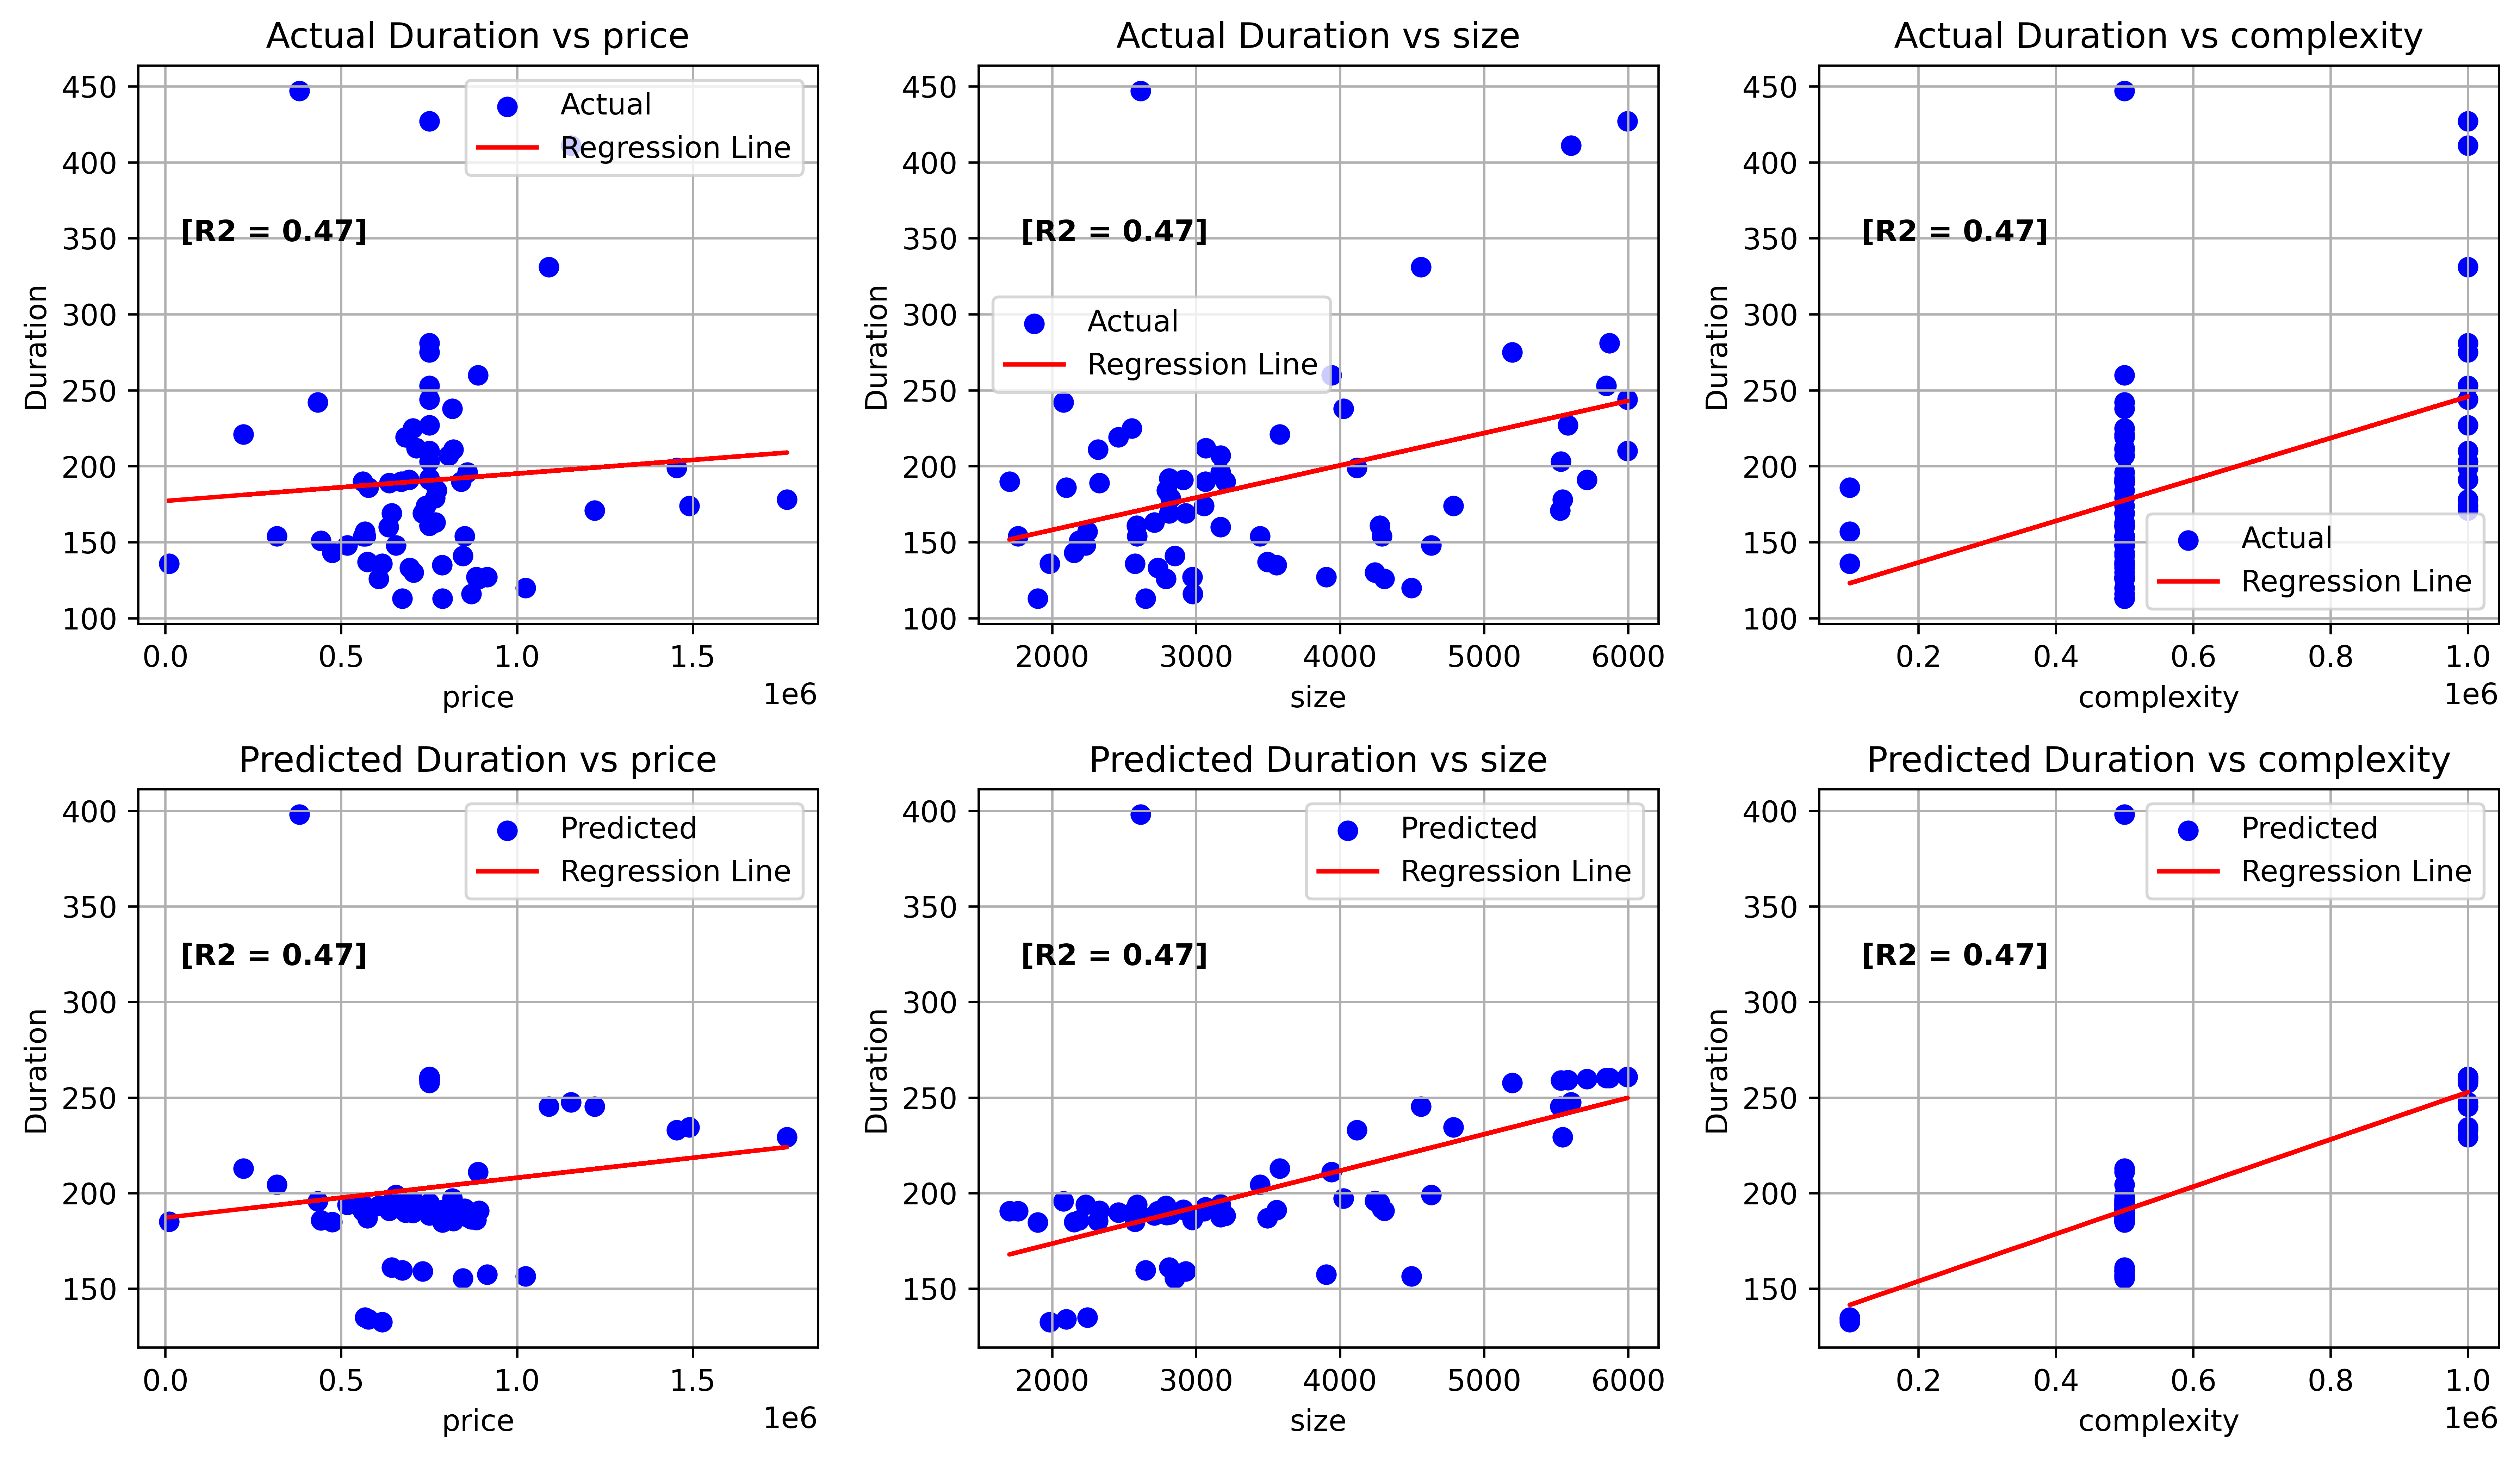

In [9]:
X = data[['size', 'complexity', 'price', 'location']]
# Plot actual durations with each feature
plt.figure(figsize=(16, 10))
features = ['price', 'size', 'complexity']

for i, feature in enumerate(features):
    plt.subplot(3, 4, i+1)
    plt.scatter(X[feature], y, color='blue', label='Actual')
    plt.title('Actual Duration vs {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Duration')
    plt.grid(True)

    # Calculate and plot regression line
    m, b = np.polyfit(X[feature], y, 1)
    plt.plot(X[feature], m*X[feature] + b, color='red', label='Regression Line')
    plt.legend()

    # Calculate R2
    r2 = r2_score(y, y_all_pred)
    plt.text(0.2, 0.7, '[R2 = {:.2f}]'.format(r2), ha='center', va='center', transform=plt.gca().transAxes, weight='bold')

# Plot predicted durations with each feature
for i, feature in enumerate(features):
    plt.subplot(3, 4, i+5)
    plt.scatter(X[feature], y_all_pred, color='blue', label='Predicted')
    plt.title('Predicted Duration vs {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Duration')
    plt.grid(True)

    # Calculate and plot regression line
    m, b = np.polyfit(X[feature], y_all_pred, 1)
    plt.plot(X[feature], m*X[feature] + b, color='red', label='Regression Line')
    plt.legend()

    # Calculate R2
    r2 = r2_score(y, y_all_pred)
    plt.text(0.2, 0.7, '[R2 = {:.2f}]'.format(r2), ha='center', va='center', transform=plt.gca().transAxes, weight='bold')
    
plt.tight_layout()
plt.show()

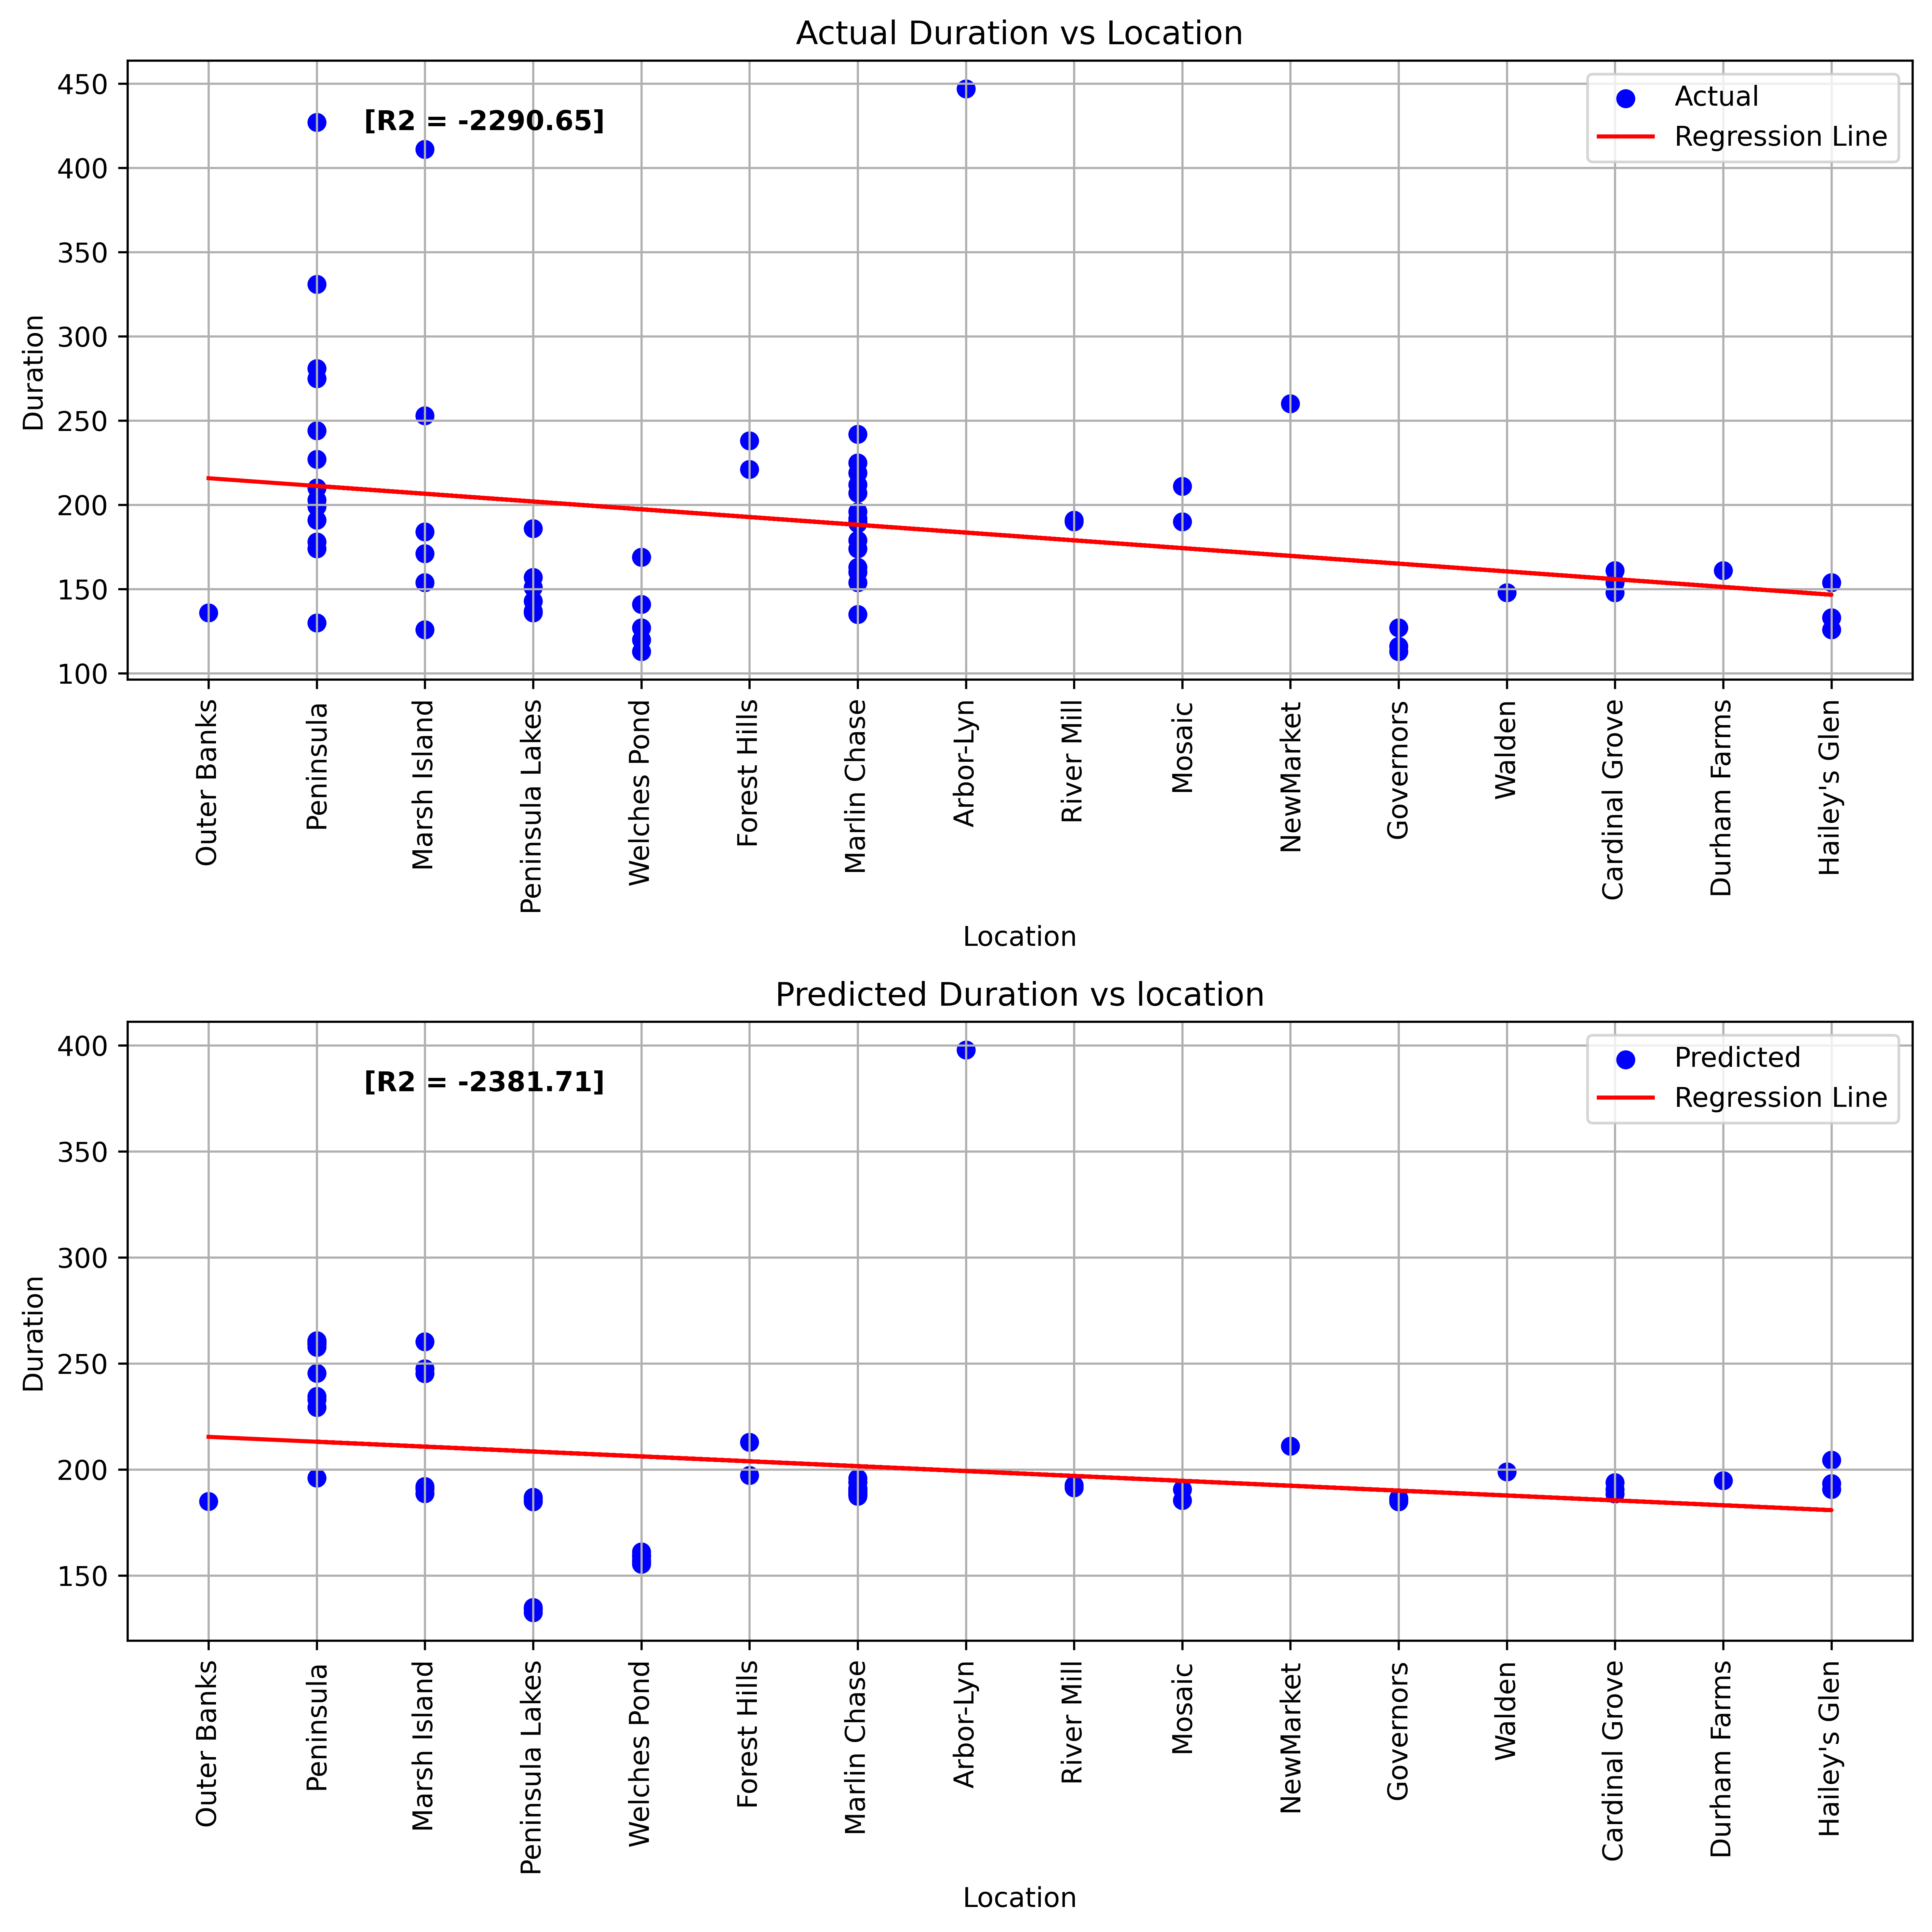

In [ ]:
X = data[['size', 'complexity', 'price', 'location']]
X2 = X.copy()
# Assuming 'location' is a categorical variable in X
# Convert categorical variables to numerical
pd.options.mode.copy_on_write = True
X['location'], _ = pd.factorize(X['location'])

# Plot actual durations with location feature
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.scatter(X2['location'], y, color='blue', label='Actual')
plt.xticks(rotation='vertical')
plt.title('Actual Duration vs Location')
plt.xlabel('Location')
plt.ylabel('Duration')
plt.grid(True)

# Calculate and plot regression line
m, b = np.polyfit(X['location'], y, 1)
plt.plot(X['location'], m*X['location'] + b, color='red', label='Regression Line')
plt.legend()
# Calculate R2
r2 = r2_score(X['location'], y)
plt.text(0.2, 0.9, '[R2 = {:.2f}]'.format(r2), ha='center', va='center', transform=plt.gca().transAxes, weight='bold')


plt.subplot(2, 1, 2)
plt.scatter(X2['location'], y_all_pred, color='blue', label='Predicted')
plt.xticks(rotation='vertical')
plt.title('Predicted Duration vs {}'.format('location'))
plt.xlabel('Location')
plt.ylabel('Duration')
plt.grid(True)
# Calculate and plot regression line
m, b = np.polyfit(X['location'], y_all_pred, 1)
plt.plot(X['location'], m*X['location'] + b, color='red', label='Regression Line')
plt.legend()
# Calculate R2
r2 = r2_score(X['location'], y_all_pred)
plt.text(0.2, 0.9, '[R2 = {:.2f}]'.format(r2), ha='center', va='center', transform=plt.gca().transAxes, weight='bold')



plt.tight_layout()
plt.show()